In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import librosa
import os
import multiprocessing
from sklearn.model_selection import train_test_split
from keras import utils


DEBUG = True
SILENCE_THRESHOLD = .01
RATE = 24000
N_MFCC = 13
COL_SIZE = 30  # Try with 20 also
EPOCHS = 10


def get_wav(file_name):
    '''
    Load wav file from disk and down-samples to RATE
    '''

    y, sr = librosa.load('WavFormat/{}.wav'.format(file_name))
    print(file_name)
    return(librosa.core.resample(y=y, orig_sr=sr, target_sr=RATE, scale=True))


def to_mfcc(wav_array):
    '''
    Converts wav file to Mel Frequency Ceptral Coefficients
    '''
    return(librosa.feature.mfcc(y=wav_array, sr=RATE, n_mfcc=N_MFCC))


def split_people(df, test_size=0.2):
    '''
    Create train test split of DataFrame
    '''

    return train_test_split(df['filename'], df['native_language'], test_size=test_size, random_state=1234)


def to_categorical(y):
    '''
    Converts list of languages into a binary class matrix
    '''
    lang_dict = {}
    for index, language in enumerate(set(y)):
        lang_dict[language] = index
    y = list(map(lambda x: lang_dict[x], y))
    return utils.to_categorical(y, len(lang_dict))


def make_segments(mfccs, labels):
    '''
    Makes segments of mfccs and attaches them to the labels
    '''
    segments = []
    seg_labels = []
    for mfcc, label in zip(mfccs, labels):
        for start in range(0, int(mfcc.shape[1] / COL_SIZE)):
            segments.append(mfcc[:, start * COL_SIZE:(start + 1) * COL_SIZE])
            seg_labels.append(label)
    return(segments, seg_labels)



Using TensorFlow backend.
/Users/Abhi/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Abhi/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Abhi/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Abhi/anaconda3/lib/python3.6/site-packages/tensorflo

In [3]:
df = pd.read_csv('Data/three_languages.csv')
X_train, X_test, y_train, y_test = split_people(df)

    # Count of the training and testing samples
train_count = Counter(y_train)
test_count = Counter(y_test)

    # Gives 0.47440273037542663
acc_to_beat = test_count.most_common(
        1)[0][1] / float(np.sum(list(test_count.values())))
    # print(acc_to_beat)

    # Converting to numerical categories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Loading .wav files!!!")
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
X_train = pool.map(get_wav, X_train)
X_test = pool.map(get_wav, X_test)
print("Conversion to MFCC!!!")
X_train = pool.map(to_mfcc, X_train)
X_test = pool.map(to_mfcc, X_test)
X_train, y_train = make_segments(X_train, y_train)
X_validation, y_validation = make_segments(X_test, y_test)
print("Done!!")

Loading .wav files!!!
english126
spanish222
arabic170
arabic131
english440
arabic16
english315
english102
arabic101
english130
arabic90
english498
english365
english33
spanish15
english298
english389
arabic6
english184
spanish224
english584
english62
english136
english189
english210
spanish175
english270
english356
arabic114
english382
arabic133
arabic136
english530
english162
english282
english346
arabic142
arabic14
english207
arabic107
spanish65
spanish18
spanish121
english512
arabic112
english576
english529
english80
spanish104
english172
spanish44
arabic124
english499
english244
english161
english165
spanish54
arabic125
english230
spanish50
english483
english583
arabic148
english123
spanish31
english125
english15
arabic187
arabic156
english92
spanish24
english227
english370
english461
english218
english617
english56
english323
arabic96
arabic145
english549
spanish179
english52
english84
english401
english644
spanish69
english114
english31
english292
arabic97
english536
english46
en

english198
english592
english109
english215
arabic38
english242
arabic12
arabic7
arabic99
english444
english260
spanish86
spanish135
english595
spanish32
spanish177
spanish109
spanish117
english178
english55
english287
arabic83
english266
english17
spanish39
english222
english495
english555
spanish79
arabic191
spanish170
english190
arabic42
english243
english293
spanish128
spanish89
english532
arabic152
english304
english239
english563
spanish182
english158
spanish12
english546
spanish124
english476
spanish7
english343
spanish213
english587
english20
spanish26
arabic10
english212
spanish173
spanish149
english506
arabic33
english492
spanish108
spanish98
english281
arabic75
spanish206
arabic118
english571
arabic92
english552
english556
english372
english504
english445
english103
spanish226
english306
spanish49
english593
spanish41
english505
english422
arabic180
arabic74
english3
english589
english137
english481
english477
spanish219
arabic36
english579
english533
english569
spanish141
e

Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/Abhi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/Abhi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/Abhi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/Abhi/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/Abhi/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Abhi/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Abhi/anaconda3/lib/pyth

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [15]:
import keras
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, TensorBoard

import pandas as pd
import matplotlib.pyplot as plt 

def cnn_model(X_train,y_train,X_validation,y_validation, batch_size=64):
    
        '''
        Trains 2D convolutional neural network
        :param X_train: Numpy array of mfccs
        :param y_train: Binary matrix based on labels
        :return: CNN model
        '''
        
        rows = X_train[0].shape[0]
        cols = X_train[0].shape[1]
        val_rows = X_validation[0].shape[0]
        val_cols = X_validation[0].shape[1]
        num_classes = len(y_train[0])
        input_shape = (rows, cols, 1)
        X_train = X_train.reshape(X_train.shape[0], rows, cols, 1 )
        X_validation = X_validation.reshape(X_validation.shape[0],val_rows,val_cols,1)
    
        model = keras.models.Sequential([
            Conv2D(64, kernel_size=(3,3), activation='relu',
                         data_format="channels_last",
                         input_shape=input_shape),
            MaxPooling2D(pool_size=(2, 2)),
            BatchNormalization(),
            Conv2D(64,kernel_size=(3,3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            BatchNormalization(),
            Dropout(0.25),
            Flatten(),
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',
                      optimizer='adadelta',
                      metrics=['accuracy'])
    
        es = EarlyStopping(monitor='acc', min_delta=.005, patience=10, verbose=1, mode='auto')
        # Creates log file for graphical interpretation using TensorBoard
        tb = TensorBoard(log_dir='../logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=True,
                         write_images=True, embeddings_freq=0, embeddings_layer_names=None,
                         embeddings_metadata=None)
        # Image shifting
        datagen = ImageDataGenerator(width_shift_range=0.05)
        # Fit model using ImageDataGenerator
        history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(X_train) / 32
                        , epochs=(EPOCHS+5),
                        callbacks=[es,tb], validation_data=(X_validation,y_validation),verbose = 2)
    
        #history = model.fit(X_train,y_train, batch_size = batch_size,epochs = EPOCHS,callbacks = [es,tb], validation_data=(X_validation,y_validation),verbose = 2)
        pd.DataFrame(history.history).plot(figsize = (10,5))
        plt.grid(True)
        plt.gca().set_ylim(0,1)
        plt.show()
    
        return (model)

Epoch 1/15
 - 101s - loss: 1.0359 - accuracy: 0.5133 - val_loss: 0.8950 - val_accuracy: 0.5752
Epoch 2/15


/Users/Abhi/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 85s - loss: 0.9073 - accuracy: 0.5671 - val_loss: 0.8792 - val_accuracy: 0.5944
Epoch 3/15
 - 93s - loss: 0.8731 - accuracy: 0.5906 - val_loss: 0.8645 - val_accuracy: 0.6148
Epoch 4/15
 - 86s - loss: 0.8491 - accuracy: 0.6043 - val_loss: 0.8632 - val_accuracy: 0.6164
Epoch 5/15
 - 98s - loss: 0.8324 - accuracy: 0.6151 - val_loss: 0.8292 - val_accuracy: 0.6336
Epoch 6/15
 - 95s - loss: 0.8140 - accuracy: 0.6272 - val_loss: 0.8423 - val_accuracy: 0.6233
Epoch 7/15
 - 82s - loss: 0.8024 - accuracy: 0.6335 - val_loss: 0.8286 - val_accuracy: 0.6271
Epoch 8/15
 - 82s - loss: 0.7893 - accuracy: 0.6432 - val_loss: 0.8697 - val_accuracy: 0.6042
Epoch 9/15
 - 90s - loss: 0.7797 - accuracy: 0.6462 - val_loss: 0.8625 - val_accuracy: 0.6160
Epoch 10/15
 - 89s - loss: 0.7741 - accuracy: 0.6485 - val_loss: 0.8275 - val_accuracy: 0.6302
Epoch 11/15
 - 86s - loss: 0.7629 - accuracy: 0.6571 - val_loss: 0.8449 - val_accuracy: 0.6180
Epoch 12/15
 - 75s - loss: 0.7555 - accuracy: 0.6610 - val_loss: 0.83

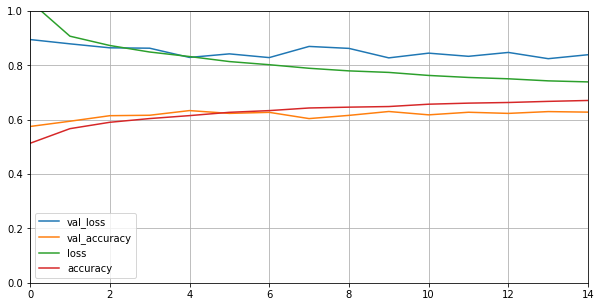

In [16]:
model = cnn_model(np.array(X_train), np.array(y_train), np.array(X_validation),np.array(y_validation))


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 11, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 14, 64)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 14, 64)         256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 12, 64)         36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 6, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 6, 64)          256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 6, 64)         

In [18]:
from collections import Counter
import numpy as np

def predict_class_audio(MFCCs, model):
    '''
    Predict class based on MFCC samples
    :param MFCCs: Numpy array of MFCCs
    :param model: Trained model
    :return: Predicted class of MFCC segment group
    '''
    MFCCs = MFCCs.reshape(MFCCs.shape[0],MFCCs.shape[1],MFCCs.shape[2],1)
    y_predicted = model.predict_classes(MFCCs,verbose=0)
    return(Counter(list(y_predicted)).most_common(1)[0][0])


def predict_prob_class_audio(MFCCs, model):
    '''
    Predict class based on MFCC samples' probabilities
    :param MFCCs: Numpy array of MFCCs
    :param model: Trained model
    :return: Predicted class of MFCC segment group
    '''
    MFCCs = MFCCs.reshape(MFCCs.shape[0],MFCCs.shape[1],MFCCs.shape[2],1)
    y_predicted = model.predict_proba(MFCCs,verbose=0)
    return(np.argmax(np.sum(y_predicted,axis=0)))

def predict_class_all(X_train, model):
    '''
    :param X_train: List of segmented mfccs
    :param model: trained model
    :return: list of predictions
    '''
    predictions = []
    for mfcc in X_train:
        predictions.append(predict_class_audio(mfcc, model))
        # predictions.append(predict_prob_class_audio(mfcc, model))
    return predictions

def confusion_matrix(y_predicted,y_test):
    '''
    Create confusion matrix
    :param y_predicted: list of predictions
    :param y_test: numpy array of shape (len(y_test), number of classes). 1.'s at index of actual, otherwise 0.
    :return: numpy array. confusion matrix
    '''
    confusion_matrix = np.zeros((len(y_test[0]),len(y_test[0])),dtype=int )
    for index, predicted in enumerate(y_predicted):
        confusion_matrix[np.argmax(y_test[index])][predicted] += 1
    return(confusion_matrix)

def get_accuracy(y_predicted,y_test):
    '''
    Get accuracy
    :param y_predicted: numpy array of predictions
    :param y_test: numpy array of actual
    :return: accuracy
    '''
    c_matrix = confusion_matrix(y_predicted,y_test)
    return( np.sum(c_matrix.diagonal()) / float(np.sum(c_matrix)))
def segment_one(mfcc):
    '''
    Creates segments from on mfcc image. If last segments is not long enough to be length of columns divided by COL_SIZE
    :param mfcc (numpy array): MFCC array
    :return (numpy array): Segmented MFCC array
    '''
    segments = []
    for start in range(0, int(mfcc.shape[1] / COL_SIZE)):
        segments.append(mfcc[:, start * COL_SIZE:(start + 1) * COL_SIZE])
    return(np.array(segments))

def create_segmented_mfccs(X_train):
    '''
    Creates segmented MFCCs from X_train
    :param X_train: list of MFCCs
    :return: segmented mfccs
    '''
    segmented_mfccs = []
    for mfcc in X_train:
        segmented_mfccs.append(segment_one(mfcc))
    return(segmented_mfccs)



In [19]:
y_predicted = predict_class_all(create_segmented_mfccs(X_test), model)

# Print statistics
print('Training samples:', train_count)
print('Testing samples:', test_count)
print('Accuracy to beat:', acc_to_beat)
print('Confusion matrix of total samples:\n', np.sum(confusion_matrix(y_predicted, y_test),axis=1))
print('Confusion matrix:\n',confusion_matrix(y_predicted, y_test))
print('Accuracy:', get_accuracy(y_predicted,y_test))


Training samples: Counter({'english': 508, 'spanish': 189, 'arabic': 157})
Testing samples: Counter({'english': 138, 'spanish': 39, 'arabic': 37})
Accuracy to beat: 0.6448598130841121
Confusion matrix of total samples:
 [ 39 138  37]
Confusion matrix:
 [[  9  22   8]
 [  2 132   4]
 [  2  13  22]]
Accuracy: 0.7616822429906542
